In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [53]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [55]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [56]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [57]:
# Rename the column "Annual Income (k$)" to "Annual Income"
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df.head()


,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


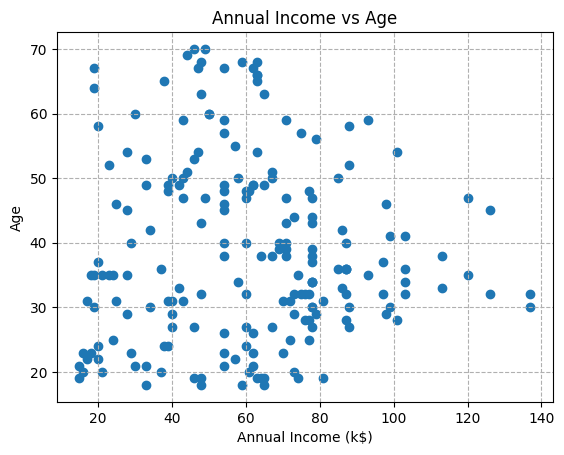

In [58]:
plt.scatter(df['Annual Income'], df['Age'])
plt.title('Annual Income vs Age')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()


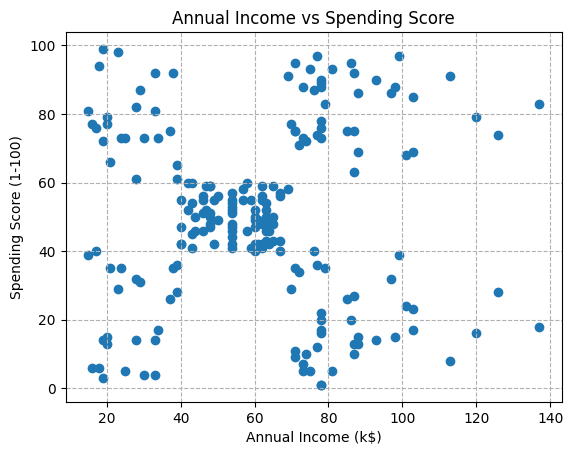

In [59]:
plt.scatter(df['Annual Income'], df['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(axis='both', linestyle='--')
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the columns for clustering from the original df using their current names
df_clustering = df[["Age", "Annual Income", "Spending Score (1-100)"]].copy()

sc = StandardScaler()
df_sc_scaled = pd.DataFrame(sc.fit_transform(df_clustering), columns=["Age", "Annual Income", "Spending Score (1-100)"])

**Data Scaling (Choose One)**

,Age,Annual Income
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660


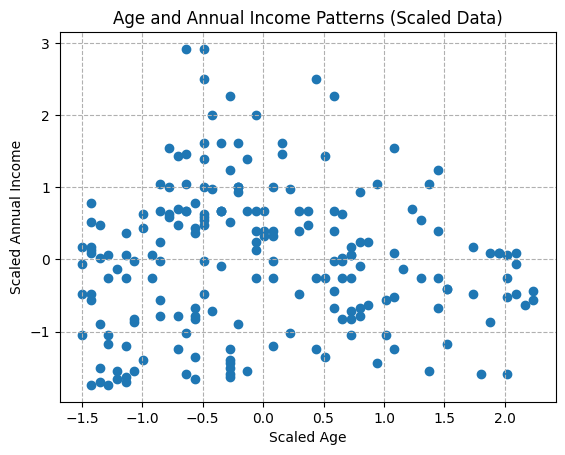

In [62]:
# Select the columns for scaling (Age and Annual Income) and create a copy
df_income_age = df[["Age", "Annual Income"]].copy()

# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled_income_age = pd.DataFrame(sc.fit_transform(df_income_age), columns=["Age", "Annual Income"])

display(df_sc_scaled_income_age.head())

# visualization
plt.scatter(df_sc_scaled_income_age["Age"], df_sc_scaled_income_age["Annual Income"])
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Annual Income Patterns (Scaled Data)")
plt.show()

Key Insights:

Age and Annual Income are essential for clustering because they directly influence customer spending behavior, product preferences, and life stages.

Scaling these features ensures they contribute equally to the clustering process, preventing any bias from their different ranges.

The scatter plot helps visualize how customers are distributed based on these two features after scaling, providing insights into the clusters.

**K-Means Clustering**

In [63]:
from sklearn.cluster import KMeans

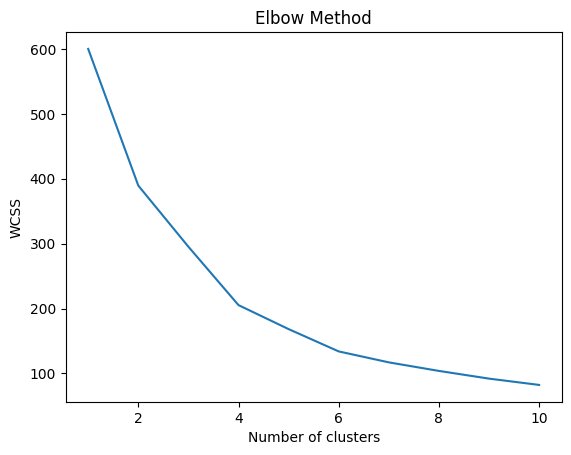

In [64]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


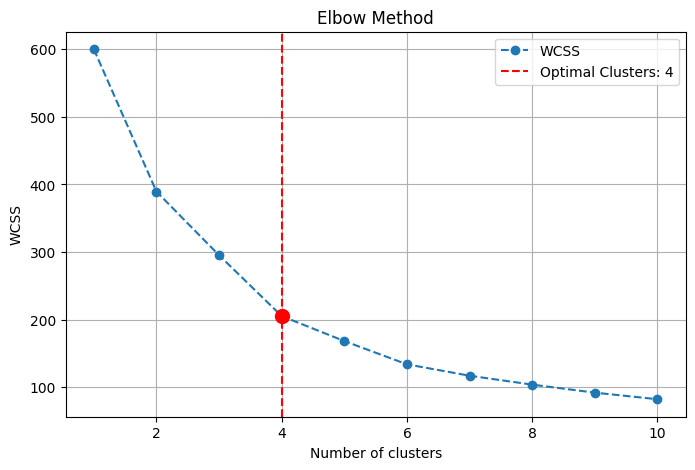

The optimal number of clusters is: 4


In [65]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [72]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100),KMeans_Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


/tmp/ipython-input-2637191649.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


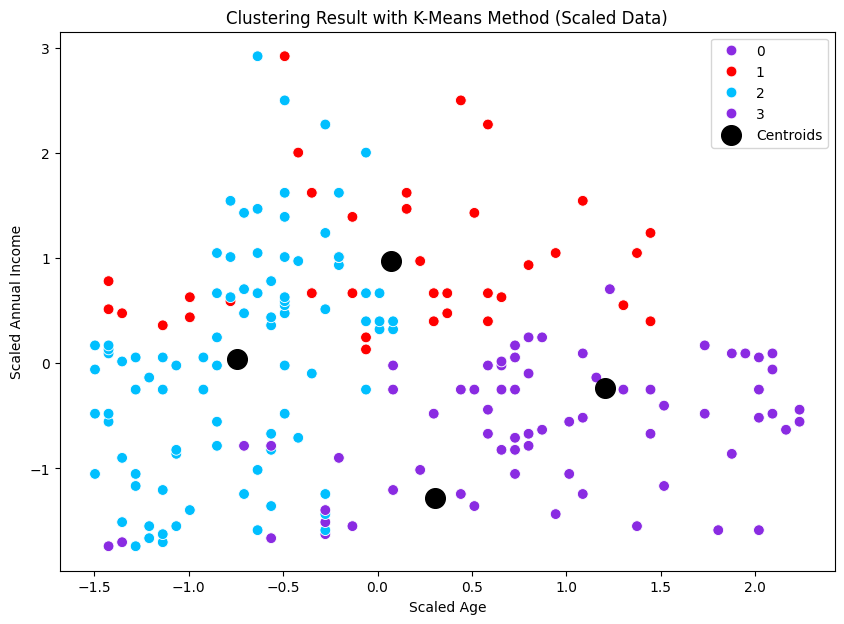

In [73]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

**Cluster 0 (Red):**

This cluster contains customers with a low scaled income and younger ages, generally appearing on the lower left side of the plot. This group might represent younger consumers with lower income levels.

**Cluster 1 (Blue):**

Customers in this cluster show moderate scaled income and age ranges, and are distributed towards the middle of the plot. This group could represent consumers in early career stages, possibly still building financial stability.

**Cluster 2 (Purple):**

This cluster is centered around higher scaled income and older ages, with customers located towards the upper-right of the plot. These might be mid-to-late career individuals with higher income and financial stability.

**Cluster 3 (Cyan):**

This cluster appears to include middle-aged individuals with higher income as well. It forms a separate group further on the right side of the plot, suggesting a more niche group with slightly different financial characteristics.

**Centroids:**

The black dots represent the centroids (or central points) of each cluster, showing the average position of customers within each cluster. These centroids are useful for understanding the overall characteristics of each group, as they represent the "center" of the data points in each cluster.

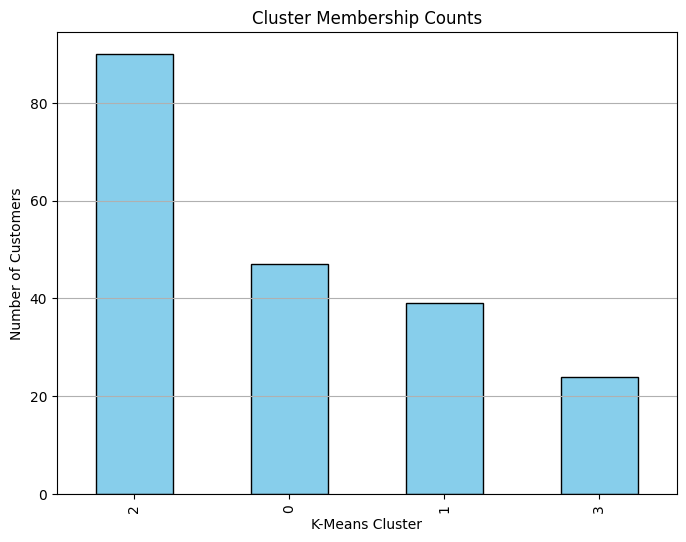

In [74]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


**Cluster 2** has the largest number of customers, with over 80 individuals assigned to this cluster. This suggests that this group is the most prevalent and likely represents the most significant customer base in terms of volume.

**Cluster 0** follows with around 50 customers, indicating a moderate group size with distinct characteristics.

**Cluster 1** has a smaller number of customers, with around 40, suggesting a smaller but still notable segment.

**Cluster 3** contains the smallest number of customers, with just around 20, representing the least common group.

In [75]:
# Group the data by cluster and calculate the mean, min, and max for each relevant column
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
})

# Rename the index axis for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

display(cluster_summary)

Age         Annual Income           \
                     mean min max          mean min  max   
KMeans_cluster                                             
0               55.638298  40  70     54.382979  38   79   
1               39.871795  19  59     86.102564  64  137   
2               28.500000  18  40     61.677778  15  137   
3               43.125000  19  67     26.958333  15   40   

               Spending Score (1-100)          
                                 mean min max  
KMeans_cluster                                 
0                           48.851064  35  60  
1                           19.358974   1  42  
2                           71.766667  41  99  
3                           22.083333   3  42

**Cluster 0: Young / Mid-Income Consumers**

Profile:

Age: Around 28 years old (mostly 26–32).

Annual Income: Moderate (~$58K average).

Spending Score: Moderate (~39 on a scale of 1-100).

Implications:

These consumers are at the beginning stages of their careers, potentially with limited disposable income. They may be looking for affordable products or entry-level offerings.

Marketing should focus on digital channels (e.g., social media, influencers), as this group is tech-savvy and responsive to online engagement.

Offering loyalty programs or bundled discounts would help build long-term relationships.

Messages can focus on career growth, lifestyle, and aspirations.

**Cluster 1: Mature / High-Income Professionals**

Profile:

Age: Average between 35–42 years old.

Annual Income: The highest among the clusters (~$150K average).

Spending Score: Lower (~19 on a scale of 1-100), suggesting they are more selective with spending.

Implications:

This group represents established professionals with strong purchasing power, so they value premium products and services.

Marketing strategies should emphasize quality, status, and convenience. Focus on exclusivity and high-end services.

Offering VIP memberships or personalized experiences would resonate with them.

Long-term retention programs focusing on brand reliability and trust would be effective. They are ideal for cross-selling or upselling.

**Cluster 2: Older-Mid / Moderate-Income Group**

Profile:

Age: Around 39–43 years old.

Annual Income: Mid-level (~$68K average).

Spending Score: High (~70 on a scale of 1-100), indicating frequent spending.

Implications:

This group is likely in mid-career or nearing financial stability. They may have family or mortgage commitments.

Marketing strategies should offer a balance between quality and price. Value-for-money packages would appeal to them.

Emphasize trust, security, and practicality in communication (e.g., durability, customer support).

Family-oriented campaigns and financing options may be effective to ease their purchase decisions.

**Cluster 3: Young / Low-Income Consumers**

Profile:

Age: Mostly younger individuals.

Annual Income: Lower-income group.

Spending Score: Varied, but potentially low to moderate.

Implications:

This group may consist of younger individuals just entering the workforce, with limited purchasing power.

Offering affordable or entry-level products would resonate with this cluster.

Digital marketing (social media, apps) would be effective, as this demographic is likely tech-savvy.

Loyalty programs or promotions would help engage this audience over time and increase customer retention.